In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df_train = pd.read_csv('train_data.txt', sep = ' ::: ', engine='python', header=None, names=["ID", "TITLE", "GENRE", "DESCRIPTION"])
df_train.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [3]:
df_test = pd.read_csv('test_data.txt', sep = ' ::: ', engine='python', header=None, names=["ID", "TITLE", "DESCRIPTION"])
df_test.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


In [4]:
df_test_sol = pd.read_csv('test_data_solution.txt', sep = ' ::: ', engine='python', header=None, names=["ID", "TITLE", "GENRE", "DESCRIPTION"])
df_test_sol.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [7]:
df_train.shape

(54214, 4)

In [8]:
df_test.shape

(54200, 3)

In [9]:
all_genres = set()
for genres in df_train['GENRE']:
    all_genres.add(genres)
all_genres = sorted(list(all_genres))
print("Unique genres:", all_genres)

Unique genres: ['action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'game-show', 'history', 'horror', 'music', 'musical', 'mystery', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show', 'thriller', 'war', 'western']


In [10]:
df_train['GENRE'] = df_train['GENRE'].str.strip().str.lower()

In [11]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df_train['GENRE'].apply(lambda x: [x] if isinstance(x, str) else x))

In [12]:
text_data = df_train['DESCRIPTION'].values

In [13]:
# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=10000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.7
)

X = tfidf.fit_transform(text_data)
print("TF-IDF matrix shape:", X.shape)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

TF-IDF matrix shape: (54214, 10000)


# Model Buliding and Evaluation

In [15]:
# Logistic Regression
lr_clf = MultiOutputClassifier(LogisticRegression(max_iter=1000, n_jobs=-1))
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred, target_names=mlb.classes_, zero_division=0))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      action       0.73      0.04      0.08       263
       adult       0.75      0.08      0.15       112
   adventure       0.57      0.03      0.05       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.77      0.28      0.41      1443
       crime       0.00      0.00      0.00       107
 documentary       0.82      0.67      0.74      2659
       drama       0.70      0.46      0.55      2697
      family       0.67      0.01      0.03       150
     fantasy       0.00      0.00      0.00        74
   game-show       1.00      0.17      0.30        40
     history       0.00      0.00      0.00        45
      horror       0.82      0.28      0.42       431
       music       0.72      0.22      0.33       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00     

# Model Improvement And Analysis

In [17]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__solver': ['lbfgs', 'sag']
}

# Grid search
grid_search = GridSearchCV(
    MultiOutputClassifier(LogisticRegression(max_iter=1000, n_jobs=-1)),
    param_grid,
    cv=3,
    scoring='f1_micro',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate best model
best_lr = grid_search.best_estimator_
best_pred = best_lr.predict(X_test)
print("Optimized Logistic Regression Report:")
print(classification_report(y_test, best_pred, target_names=mlb.classes_, zero_division=0))

Best parameters: {'estimator__C': 10, 'estimator__solver': 'lbfgs'}
Optimized Logistic Regression Report:
              precision    recall  f1-score   support

      action       0.58      0.16      0.26       263
       adult       0.74      0.23      0.35       112
   adventure       0.47      0.10      0.17       139
   animation       0.50      0.07      0.12       104
   biography       0.00      0.00      0.00        61
      comedy       0.62      0.44      0.51      1443
       crime       0.67      0.06      0.10       107
 documentary       0.77      0.70      0.73      2659
       drama       0.61      0.52      0.56      2697
      family       0.48      0.09      0.15       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.90      0.45      0.60        40
     history       0.00      0.00      0.00        45
      horror       0.72      0.47      0.57       431
       music       0.64      0.42      0.50       144
     musical       0.50      

# Prediction Function

In [19]:
def predict_genres(text, model=best_lr, threshold=0.3):
    
    # Transform text to TF-IDF
    text_tfidf = tfidf.transform([text])
    
    # Get probabilities for each genre
    probas = model.predict_proba(text_tfidf)
    
    # Create dictionary of genre probabilities
    genre_probs = {}
    for i, genre in enumerate(mlb.classes_):
        genre_probs[genre] = probas[i][0][1]  # Probability of positive class
        
    # Filter genres above threshold
    predicted_genres = {k:v for k,v in genre_probs.items() if v >= threshold}
    
    # Sort by probability
    return dict(sorted(predicted_genres.items(), key=lambda item: item[1], reverse=True))

# Example usage
sample_plot = "A young boy discovers he's a wizard and is sent to a magical school where he makes friends and enemies while uncovering secrets about his past."
print("Predicted genres:", predict_genres(sample_plot))

Predicted genres: {'drama': 0.4901935411925282}


# Visualization 

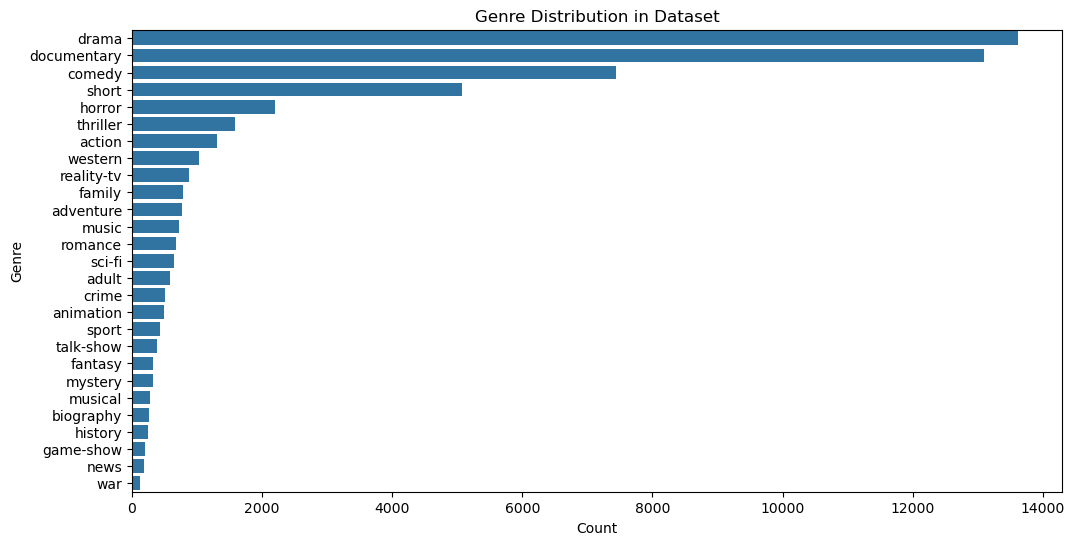

In [21]:
# Plot genre distribution
genre_counts = pd.Series(mlb.inverse_transform(y)).explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Genre Distribution in Dataset')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Available genres: ['action' 'adult' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'game-show' 'history' 'horror'
 'music' 'musical' 'mystery' 'news' 'reality-tv' 'romance' 'sci-fi'
 'short' 'sport' 'talk-show' 'thriller' 'war' 'western']


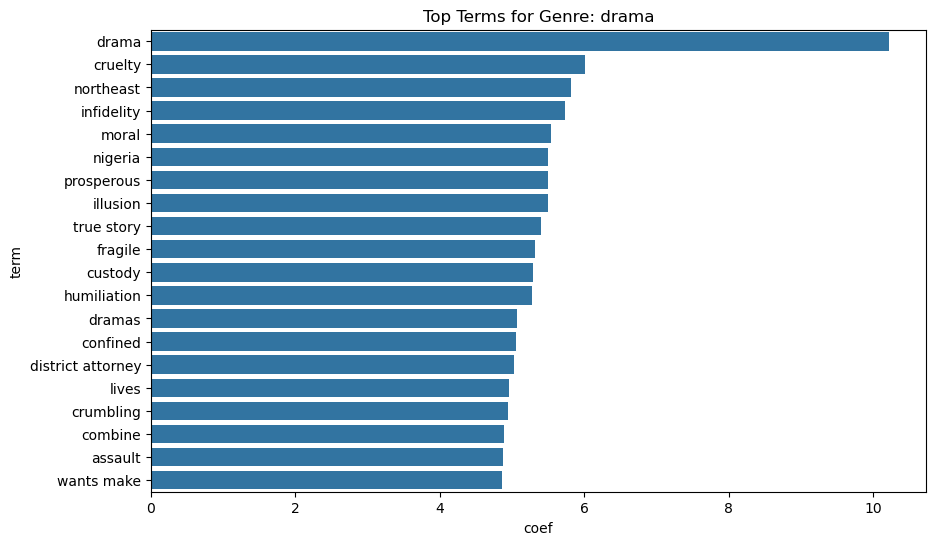

In [23]:
# Plot feature importance for a specific genre (e.g., 'Drama')
def plot_top_terms_for_genre(genre, n_terms=20):
    genre_idx = list(mlb.classes_).index(genre)
    lr_model = best_lr.estimators_[genre_idx]
    
    # Get feature importance
    feature_names = tfidf.get_feature_names_out()
    coefs = lr_model.coef_[0]
    
    # Create dataframe
    coef_df = pd.DataFrame({'term': feature_names, 'coef': coefs})
    top_terms = coef_df.sort_values('coef', ascending=False).head(n_terms)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef', y='term', data=top_terms)
    plt.title(f'Top Terms for Genre: {genre}')
    plt.show()
# First check available genres
print("Available genres:", mlb.classes_)
plot_top_terms_for_genre('drama')

# Saving the model

In [26]:
import joblib
import pickle

# Save the best model and vectorizer
joblib.dump(best_lr, 'movie_genre_classifier.pkl')
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
with open('mlb.pkl', 'wb') as f:
    pickle.dump(mlb, f)